<a href="https://colab.research.google.com/github/razafar8000/Optimizing-Ride-Efficiency/blob/main/Ride_Efficiency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# This part of the program pre processes the data from the dataset and takes care
# of missing values and outliers.

# Loading the dataset
rides_data = pd.read_csv("rides.csv")

# Preprocessing the data

# Converting ride start and end times to datetime format for easier calculations
rides_data['ride_start_time'] = pd.to_datetime(rides_data['ride_start_time'])
rides_data['ride_end_time'] = pd.to_datetime(rides_data['ride_end_time'])

# Checking for missing values in the dataset
missing_summary = rides_data.isnull().sum()

# Printing the summary
print("Missing Values Summary:\n")
print(missing_summary.to_string())

# Impute missing values for numeric columns with the median (if applicable)
rides_data['distance_km'] = rides_data['distance_km'].fillna(rides_data['distance_km'].median())
rides_data['fare_amount'] = rides_data['fare_amount'].fillna(rides_data['fare_amount'].median())

# Droping rows where critical datetime fields are missing (if applicable)
rides_data = rides_data.dropna(subset=['ride_start_time', 'ride_end_time'])

# Calculating ride duration in minutes
rides_data['ride_duration_minutes'] = (rides_data['ride_end_time'] -
                                       rides_data['ride_start_time']).dt.total_seconds() / 60

# Handling outliers using the IQR method

# Defining a function to filter outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtering out rows outside the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for critical columns
rides_data = remove_outliers(rides_data, 'distance_km')
rides_data = remove_outliers(rides_data, 'fare_amount')
rides_data = remove_outliers(rides_data, 'ride_duration_minutes')



Missing Values Summary:

ride_id            0
user_id            0
start_location     0
end_location       0
ride_start_time    0
ride_end_time      0
distance_km        0
fare_amount        0
driver_id          0


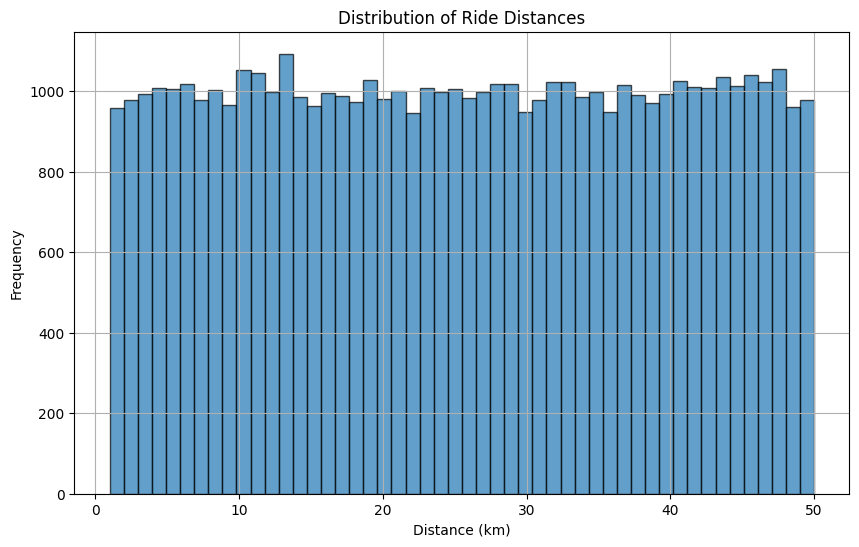

In [ ]:
# This plot shows how frequently rides occur across different distance ranges,
# highlighting the prevalence of short trips.

# Plot 1: Distribution of Ride Distances
plt.figure(figsize=(10, 6))
plt.hist(rides_data['distance_km'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Ride Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

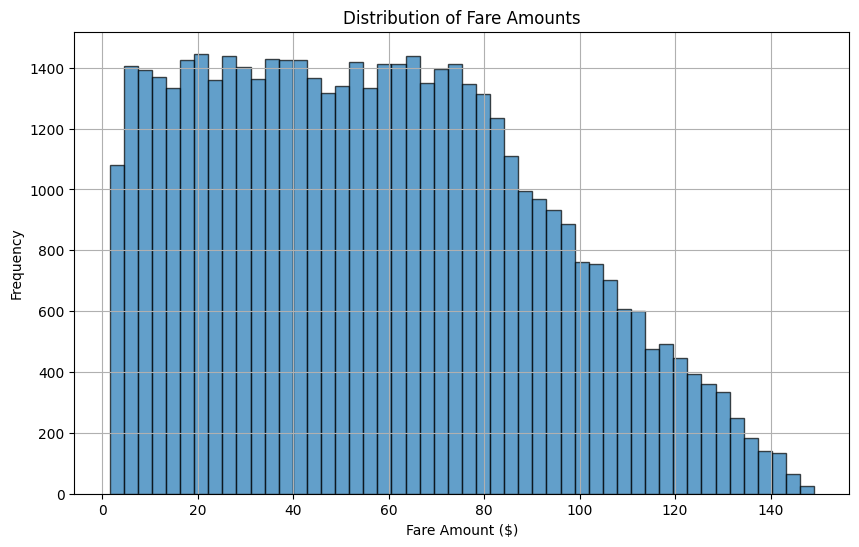

In [ ]:
# Displays the frequency of fare amounts, revealing typical pricing patterns
# and identifying expensive or unusually low fares.

# Plot 2: Distribution of Fare Amounts
plt.figure(figsize=(10, 6))
plt.hist(rides_data['fare_amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

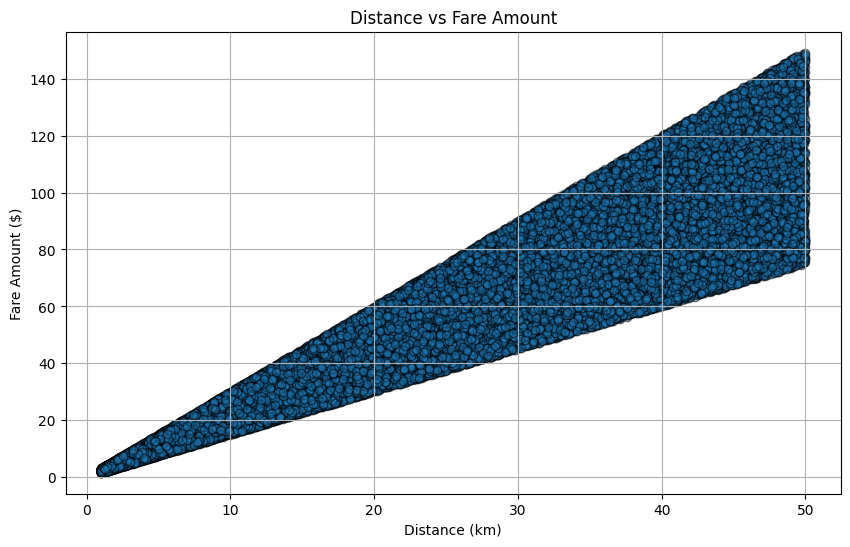

In [ ]:
# Illustrates the relationship between ride distance and fare,
# indicating how pricing scales with distance and spotting irregularities.

# Plot 3: Relationship between Distance and Fare
plt.figure(figsize=(10, 6))
plt.scatter(rides_data['distance_km'], rides_data['fare_amount'], alpha=0.5, edgecolor='k')
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

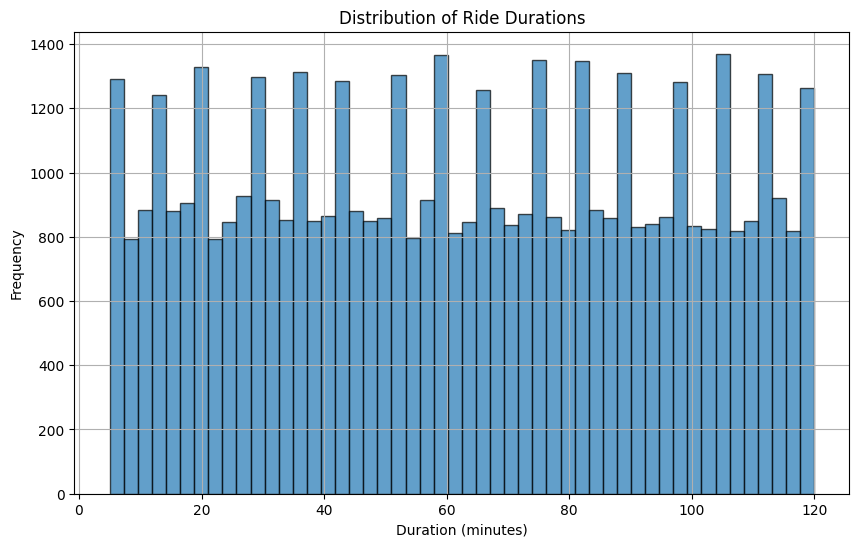

In [ ]:
# Visualizes the spread of ride durations in minutes, highlighting the most
# common trip lengths and unusually long rides.

# Plot 4: Distribution of Ride Durations
plt.figure(figsize=(10, 6))
plt.hist(rides_data['ride_duration_minutes'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Ride Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

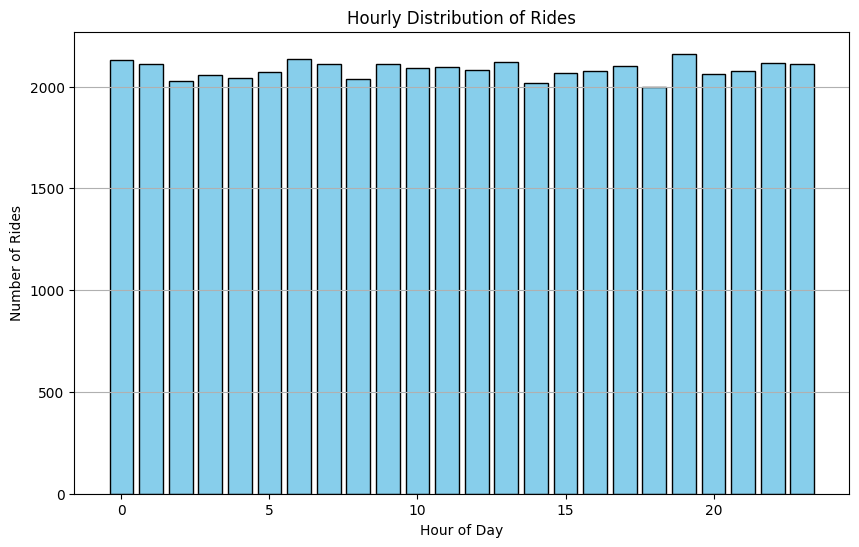

In [ ]:
# Represents the number of rides starting at each hour of the day,
# identifying peak demand times during the day.

# Plot 5: Hourly Distribution of Rides
# Extracting the hour from the ride start time
rides_data['ride_start_hour'] = rides_data['ride_start_time'].dt.hour
hourly_rides = rides_data['ride_start_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_rides.index, hourly_rides.values, color='skyblue', edgecolor='black')
plt.title("Hourly Distribution of Rides")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.grid(axis='y')
plt.show()

Linear Regression Model Results:
Mean Squared Error (MSE): 162.96
R-squared (R2): 0.86


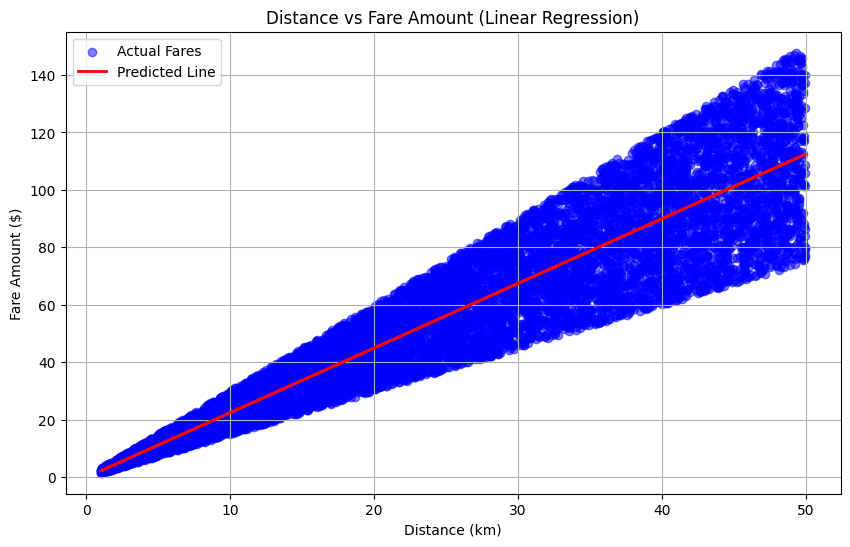

In [ ]:
# This program analyzes the relationship between ride distance and fare amount
# using a linear regression model, evaluates its performance with metrics
# like MSE and R², and visualizes the predictions to provide
# insights into fare pricing patterns.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target variable
X = rides_data[['distance_km']]  # Independent variable
y = rides_data['fare_amount']    # Dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying results
print("Linear Regression Model Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualizing the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Fares')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title("Distance vs Fare Amount (Linear Regression)")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.legend()
plt.grid(True)
plt.show()
